# Importing Relevant Libraries

In [15]:
import pandas as pd
import numpy as np
import sklearn
from textblob import TextBlob
import matplotlib.pyplot as plt
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pprint

In [16]:
# !pip install openpyxl
# !pip install textblob
# !pip install gensim


# Data Preprocessing

In [54]:
import pandas as pd

# Load the Excel file
excel_file = "AI_Engineer_Dataset_Task_1.xlsx"
df = pd.read_excel(excel_file)

# Assuming the text data is in a column named "text_column"

text_data = df["ParticipantResponse"]

# this is to test another approach
text_data_drop = df.drop(columns=['AcademicYear', 'SemesterName', 'ParticipantID', 'DegreeLevel', 'Gender', 'Nationality', 'StudentProgram',
                            'CourseCode', 'CourseName', 'QuestionText', 'QuestionType'])
# text_data.head()

# Function to preprocess text
def preprocess_text(text):
    if isinstance(text, str):
        # Convert text to lowercase
        text = text.lower()
        # Remove punctuation, special characters, and digits
        text = ''.join([char for char in text if char.isalpha() or char.isspace()])
        # Remove extra spaces
        text = ' '.join(text.split())
    else:
        # If it's not a string, convert it to an empty string
        text = ""
    return text

# Apply the preprocessing function to the text data
text_data_preprocessed = text_data.apply(preprocess_text)
text_data_preprocessed_drop = text_data_drop.apply(preprocess_text)

# Display the preprocessed text data
print(text_data_preprocessed)


0                  disagree
1         strongly disagree
2         strongly disagree
3         strongly disagree
4         strongly disagree
                ...        
180964                     
180965                agree
180966       strongly agree
180967       strongly agree
180968       strongly agree
Name: ParticipantResponse, Length: 180969, dtype: object


# Sentiment Analysis

C:\Users\jagme\AppData\Local\Temp\ipykernel_1576\3526067109.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data['Sentiment'] = text_data_preprocessed.apply(get_sentiment_polarity)


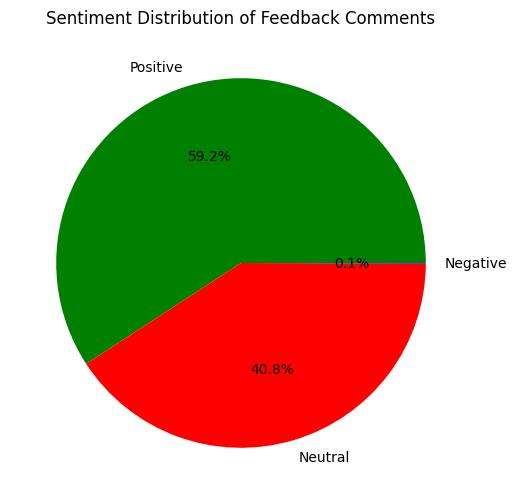

Sentiment Distribution Summary:
ParticipantResponse
Positive    107115
Neutral      73747
Negative       107
Name: count, dtype: int64


In [49]:
def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

    
# Apply sentiment analysis to each comment
text_data_preprocessed = text_data_preprocessed.astype(str)  # Ensure all values are strings
text_data['Sentiment'] = text_data_preprocessed.apply(get_sentiment_polarity)

# Calculate the distribution of sentiment
sentiment_distribution = text_data['Sentiment'].value_counts()

# Create a pie chart to visualize sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of Feedback Comments')
plt.ylabel('')
plt.show()

# Display summary statistics
print("Sentiment Distribution Summary:")
print(sentiment_distribution)

# Topic Modeling

In [18]:
# Tokenize the preprocessed text data
tokenized_data = text_data_preprocessed.apply(lambda x: x.split())

# Create a dictionary from the tokenized data
dictionary = corpora.Dictionary(tokenized_data)

# Create a document-term matrix (corpus)
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

# Define the number of topics for LDA
num_topics = 5

In [33]:
text_data_preprocessed.head()

0             disagree
1    strongly disagree
2    strongly disagree
3    strongly disagree
4    strongly disagree
Name: ParticipantResponse, dtype: object

In [19]:
# Create the LDA model
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=5, random_state=42)

# Print the topics and their representative keywords
topics = lda_model.print_topics(num_words=5)

print("Identified Topics:")
for topic in topics:
    print(topic)


Identified Topics:
(0, '0.550*"disagree" + 0.394*"strongly" + 0.027*"no" + 0.001*"comment" + 0.001*"suggestion"')
(1, '0.041*"the" + 0.024*"and" + 0.021*"course" + 0.020*"to" + 0.015*"i"')
(2, '0.498*"strongly" + 0.496*"agree" + 0.000*"na" + 0.000*"ه" + 0.000*"sssssssss"')
(3, '0.968*"agree" + 0.000*"ه" + 0.000*"sssssssss" + 0.000*"لازيوجد" + 0.000*"nn"')
(4, '0.925*"neutral" + 0.002*"nul" + 0.001*"gg" + 0.001*"ش" + 0.001*"thankz"')


# Insights and Recommendations

In [59]:
# Insights based on topic modeling
print("\nTopic Modeling Insights:")
topics = lda_model.print_topics(num_words=5)
for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {topic}")


Topic Modeling Insights:
Topic 1: (0, '0.550*"disagree" + 0.394*"strongly" + 0.027*"no" + 0.001*"comment" + 0.001*"suggestion"')
Topic 2: (1, '0.041*"the" + 0.024*"and" + 0.021*"course" + 0.020*"to" + 0.015*"i"')
Topic 3: (2, '0.498*"strongly" + 0.496*"agree" + 0.000*"na" + 0.000*"ه" + 0.000*"sssssssss"')
Topic 4: (3, '0.968*"agree" + 0.000*"ه" + 0.000*"sssssssss" + 0.000*"لازيوجد" + 0.000*"nn"')
Topic 5: (4, '0.925*"neutral" + 0.002*"nul" + 0.001*"gg" + 0.001*"ش" + 0.001*"thankz"')


In [61]:
# Insights based on sentiment analysis
positive_count = sentiment_distribution.get("Positive", 0)
negative_count = sentiment_distribution.get("Negative", 0)
neutral_count = sentiment_distribution.get("Neutral", 0)

In [62]:
# Recommendations (customize based on insights)
print("\nRecommendations:")
if positive_count > negative_count:
    print("Based on the sentiment analysis, there are more positive comments, indicating areas of strength.")
else:
    print("Based on the sentiment analysis, there are more negative comments, indicating potential areas for improvement.")



Recommendations:
Based on the sentiment analysis, there are more positive comments, indicating areas of strength.
